In [1]:
import pandas as pd
import matplotlib as plt
import wordcloud as wc
import matplotlib.pyplot as plt

In [125]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [133]:
df = pd.read_csv("sentiment_tweets.csv",encoding = 'latin1',header=None, names=['target','id','date','flag','user','text'])
df = df[['target','text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## nltk 라이브러리의 토큰 기능으로 토큰화 함

In [134]:
positive=[]
negative=[]

In [135]:
#df['tokens'] = df['text'].apply(word_tokenize)
# 불용어 리스트
stop_words = set(stopwords.words('english'))
# 토큰화 후 불용어 제거

df['tokens'] = df['text'].apply(lambda x: [token.lower() for token in word_tokenize(x) if token.lower() not in stop_words])
df

,target,text,tokens
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","[@, switchfoot, http, :, //twitpic.com/2y1zl, ..."
1,0,is upset that he can't update his Facebook by ...,"[upset, ca, n't, update, facebook, texting, ....."
2,0,@Kenichan I dived many times for the ball. Man...,"[@, kenichan, dived, many, times, ball, ., man..."
3,0,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","[@, nationwideclass, ,, 's, behaving, ., 'm, m..."
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,"[woke, ., school, best, feeling, ever]"
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,"[thewdb.com, -, cool, hear, old, walt, intervi..."
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,"[ready, mojo, makeover, ?, ask, details]"
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,"[happy, 38th, birthday, boo, alll, time, !, !,..."


In [136]:
# from nltk.tokenize import TreebankWordTokenizer

# tokenizer = TreebankWordTokenizer()

# # apply로 tokenizer.tokenize를 사용해야 합니다
# df['token2'] = df['text'].apply(tokenizer.tokenize).lowercase()
# df

In [137]:
# df의 각 행을 반복
for index, row in df.iterrows():
    #print(row['target'],row['tokens'])  # 각 행을 출력
    if row['target']==0:
        for word in row['tokens']:
            if len(word)>2  and len(word)<15:
                negative.append(word)
    if row['target']==4:
        for word in row['tokens']:
            if len(word)>2 and len(word)<15:
                positive.append(word)        
#print(negative)

In [138]:
neg_num = {}

for word in negative:
    if word in neg_num:
        neg_num[word]+=1
    else:
        neg_num[word]=1

pos_num = {}

for word in positive:
    if word in pos_num:
        pos_num[word]+=1
    else:
        pos_num[word]=1



In [139]:
print(neg_num)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



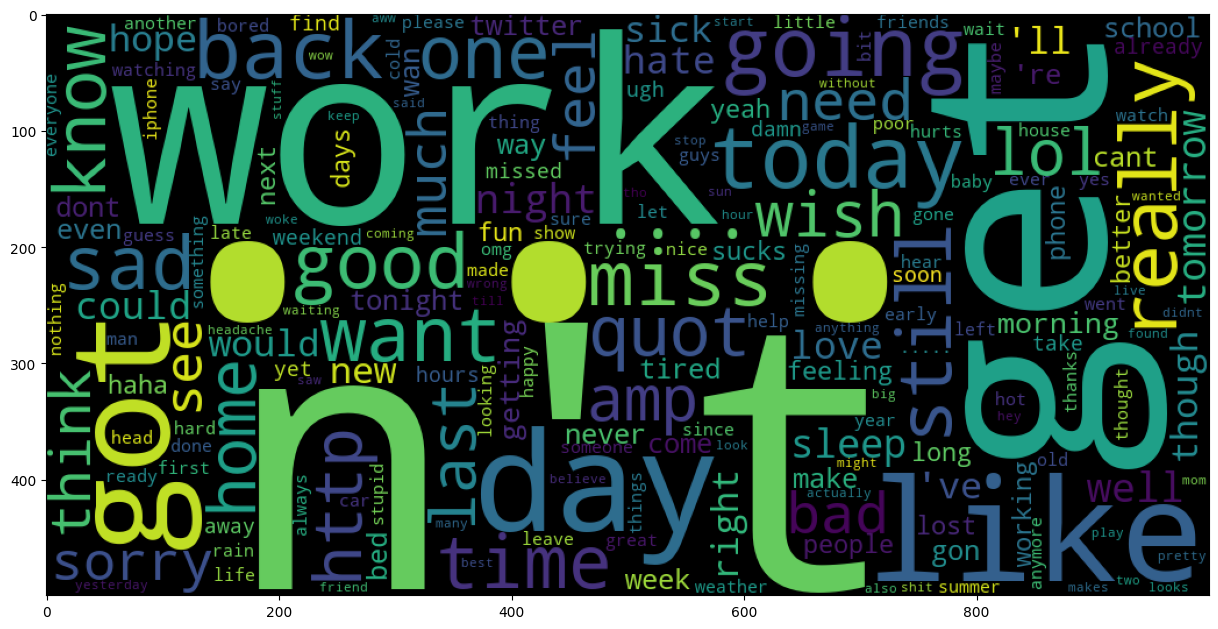

In [142]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

neg_cloud = WordCloud(width = 1000, height = 500,max_words=200).generate_from_frequencies(neg_num)

plt.figure(figsize=(15,8))
plt.imshow(neg_cloud)

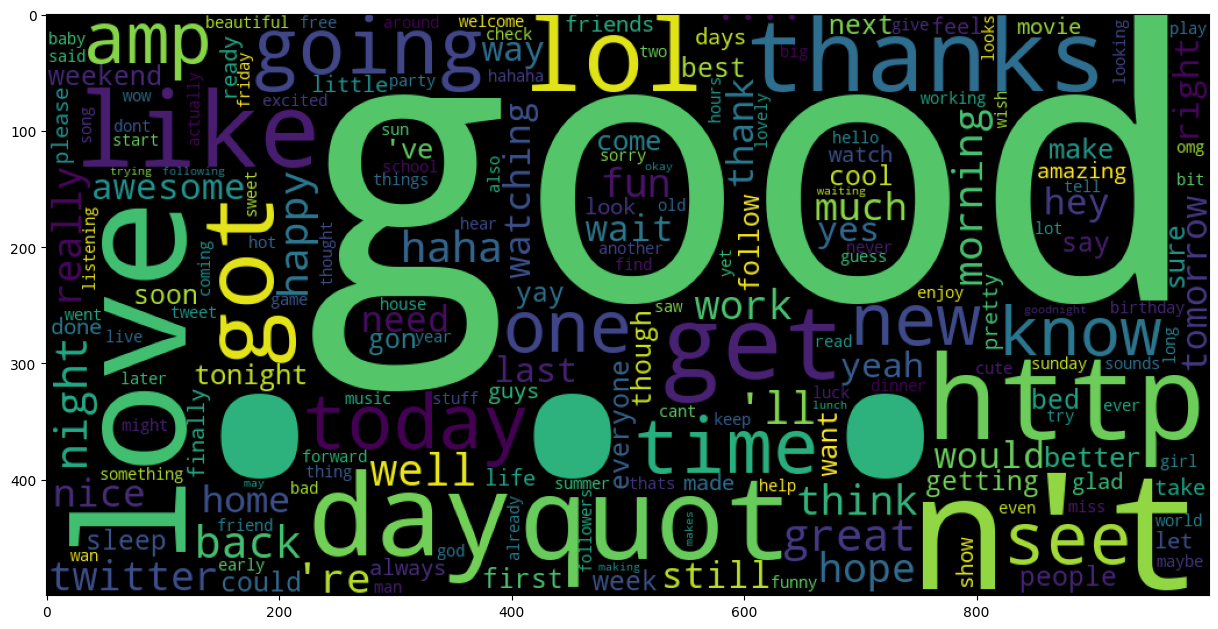

In [143]:



pos_cloud = WordCloud(width = 1000, height = 500,max_words=200).generate_from_frequencies(pos_num)

plt.figure(figsize=(15,8))
plt.imshow(pos_cloud)

## 단순 띄어쓰기 단위로 token화함

In [130]:
neg_df = df[df['target']==0]


# Assuming `neg_df` is a pandas DataFrame with a column of text
neg_df = neg_df['text'].apply(lambda x: [token.lower() for token in x.split() if token.lower() not in stop_words])
# Display the modified DataFrame
print(neg_df)



0         [@switchfoot, http://twitpic.com/2y1zl, -, aww...
1         [upset, can't, update, facebook, texting, it.....
2         [@kenichan, dived, many, times, ball., managed...
3                   [whole, body, feels, itchy, like, fire]
4         [@nationwideclass, no,, behaving, all., i'm, m...
                                ...                        
799995    [sick, spending, day, laying, bed, listening, ...
799996                                       [gmail, down?]
799997                          [rest, peace, farrah!, sad]
799998    [@eric_urbane, sounds, like, rival, flagging, ...
799999    [resit, exams, summer..., wishes, worked, hard...
Name: text, Length: 800000, dtype: object


In [131]:
neg_list=[]
for row in neg_df:
    for word in row:
        if len(word)>2 and len(word)<15:
            neg_list.append(word)

#print(neg_list)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



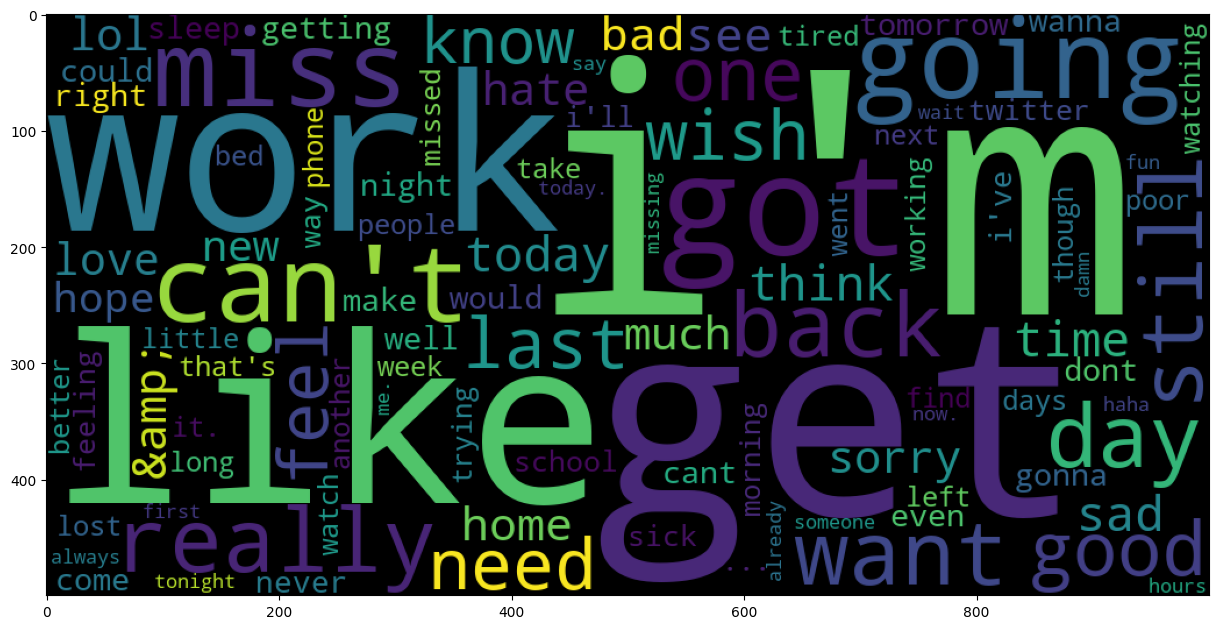

In [132]:
neg_dict = {}

for word in neg_list:
    if word in neg_dict:
        neg_dict[word]+=1
    else:
        neg_dict[word]=1
print(neg_dict)
neg_cloud2 = WordCloud(width = 1000, height = 500,max_words=100).generate_from_frequencies(neg_dict)

plt.figure(figsize=(15,8))
plt.imshow(neg_cloud2)

In [98]:
pos_df = df[df['target']==4]
pos_df

,target,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
